In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import get_raw_data
import get_preprocessing_data
import analysis_method

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

pv_list = ["0102", "1701", "1702", "0111", "0330", "0331", "0332", "0333", "0101", "0107", "0110", "5501"]
#["0102"(가구주와의 관계), "1701"(근로소득 유무), "1702"(총 연간근로소득), "0111"(학력졸업여부), "0330"(업종8차),
# "0331"(업종9차), "0332"(직종8차), "0333"(직종9차), "0101"(성별), "0107"(만나이), "0110"(학력학교), "5501"(혼인상태)]
hv_list = ["0150", "1406", "2102", "2134", "2136", " 2138", "2140", "2142", "2152", "2153", "2155",
           "2156", "2157", "2158", "2159", "2160", "2182", "2183", "2184", "2185", "2186", "2187",
           "2189", "2190", "2191"]
income_code_list = ["2102", "2134", "2136", " 2138", "2140", "2142", "2152", "2153", "2155", "2156",
                    "2157", "2158", "2159", "2160", "2182", "2183", "2184", "2185", "2186", "2187",
                    "2189", "2190", "2191"]

cpi_data = pd.read_excel("C:\\Users\\JeayongYu\\PycharmProjects\\human_captial\\data\\CPI.xls").loc[0, :]
cpi_data_index = pd.read_excel("C:\\Users\\JeayongYu\\PycharmProjects\\human_captial\\data\\CPI.xls", dtype="str").loc[14, :].values[1:]
cpi_data = pd.Series(cpi_data.values[1:], dtype="float")
cpi_data.name = "CPI"
cpi_data.index = cpi_data_index

industry_8 = pd.read_excel("C:\\Users\\JeayongYu\\PycharmProjects\\human_captial\\data\\국내데이터_산업분류.xlsx", sheet_name="8차")
industry_large = pd.read_excel("C:\\Users\\JeayongYu\\PycharmProjects\\human_captial\\data\\국내데이터_산업분류.xlsx", sheet_name="대분류")

data_num = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21"]

cpi_multiple = get_preprocessing_data.get_cpi_multi(cpi_data, data_num)

data_dict = {}
for i in data_num:
    h_path = "C:\\Users\\JeayongYu\\PycharmProjects\\human_captial\\data\\h_data\\h_" + i + ".pickle"
    p_path = "C:\\Users\\JeayongYu\\PycharmProjects\\human_captial\\data\\p_data\\p_" + i + ".pickle"

    h_data = pd.read_pickle(h_path)
    p_data = pd.read_pickle(p_path)

    raw_hdata = get_raw_data.get_hv_data(h_data, hv_list, i)
    raw_pdata = get_raw_data.get_pv_data(p_data, pv_list, i)
    
    fin_p_data = get_preprocessing_data.get_fin_personal(raw_pdata, industry_8, industry_large)
    income_data = get_preprocessing_data.get_income_data(fin_p_data.index, raw_hdata)

    fin_x_value = get_preprocessing_data.get_final_xvalue(raw_hdata, fin_p_data)
    fin_y_value = get_preprocessing_data.get_final_yvalue(income_data, cpi_multiple[i])

    finally_preprocessed_data = get_preprocessing_data.get_total_data(fin_y_value, fin_x_value)

    data_dict[i] = finally_preprocessed_data

C:\Users\JeayongYu\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_df = pd.DataFrame()
for i in data_dict.keys():
    data_df = pd.concat([data_df, data_dict[i]])

_________________
### 고졸 학력 데이터

In [3]:
data_df.groupby(["0110"]).get_group(1)

,labor income,0101,0110,0107,5501,jobtype,0330,0150,1406
hhid,,,,,,,,,
21.0,1940.968781,1,1,25,1.0,employ,도매 및 소매업 (45~47),3.0,0.0
25.0,5822.906343,1,1,37,1.0,unemploy,도매 및 소매업 (45~47),4.0,0.0
32.0,2911.453171,1,1,59,1.0,unemploy,도매 및 소매업 (45~47),4.0,1.0
33.0,3881.937562,1,1,42,1.0,unemploy,"하수 · 폐기물 처리, 원료재생 및 환경복 원업 (37 ~ 39)",4.0,1.0
40.0,5822.906343,1,1,47,1.0,unemploy,도매 및 소매업 (45~47),5.0,1.0
...,...,...,...,...,...,...,...,...,...
110085.0,6140.000000,1,1,35,1.0,employ,제조업 (10 ~ 33),4.0,0.0
110102.0,3500.000000,1,1,30,1.0,employ,제조업 (10 ~ 33),2.0,0.0
110122.0,6678.000000,1,1,37,1.0,employ,"협회 및 단체, 수리 및 기타 개인 서비스 업(94~96)",4.0,0.0


_________________
### 전문대학졸 학력 데이터

In [4]:
data_df.groupby(["0110"]).get_group(2)

,labor income,0101,0110,0107,5501,jobtype,0330,0150,1406
hhid,,,,,,,,,
8.0,2329.162537,1,2,26,0.0,employ,"전문, 과학 및 기술 서비스업 (70 ~ 73)",1.0,1.0
110.0,1940.968781,1,2,26,0.0,employ,"출판, 영상, 방송통 신 및 정보서비스업 (58 ~ 63)",1.0,0.0
256.0,5822.906343,1,2,45,1.0,employ,"전기, 가스, 증기 및 수도사업 (35 ~ 36)",5.0,1.0
264.0,1843.920342,1,2,30,1.0,employ,"전문, 과학 및 기술 서비스업 (70 ~ 73)",2.0,0.0
284.0,5182.386645,1,2,40,1.0,unemploy,운수업(49~52),3.0,0.0
...,...,...,...,...,...,...,...,...,...
110055.0,4270.000000,1,2,45,1.0,employ,운수업(49~52),4.0,1.0
110066.0,5440.000000,1,2,38,1.0,employ,운수업(49~52),4.0,0.0
110108.0,9529.000000,1,2,33,1.0,employ,제조업 (10 ~ 33),4.0,1.0


_________________
### 대학 이상 졸업 학력 데이터


In [5]:
data_df.groupby(["0110"]).get_group(3)

,labor income,0101,0110,0107,5501,jobtype,0330,0150,1406
hhid,,,,,,,,,
30.0,1940.968781,1,3,30,0.0,unemploy,숙박 및 음식점업 (55 ~ 56),1.0,0.0
36.0,6793.390733,1,3,42,1.0,employ,금융 및 보험업 (64 ~ 66),4.0,0.0
46.0,5822.906343,1,3,40,1.0,unemploy,"출판, 영상, 방송통 신 및 정보서비스업 (58 ~ 63)",5.0,1.0
47.0,4852.421952,1,3,34,1.0,employ,금융 및 보험업 (64 ~ 66),3.0,1.0
79.0,5822.906343,1,3,49,1.0,employ,"출판, 영상, 방송통 신 및 정보서비스업 (58 ~ 63)",5.0,1.0
...,...,...,...,...,...,...,...,...,...
110140.0,7395.000000,1,3,42,1.0,employ,운수업(49~52),2.0,1.0
110170.0,5539.000000,1,3,34,1.0,employ,제조업 (10 ~ 33),3.0,1.0
110185.0,2840.000000,1,3,32,1.0,employ,"공공행정, 국방 및 사회보장 행정(84)",4.0,1.0


_______________________________


### 각 Educated group별 Fixed effects regression results

In [6]:
start_list = [22, 24, 26]
edu_list = ["high_school", "college", "university"]

fer_results_dict = {}
for i in range(3):
    temp_edu = data_df.groupby(["0110"]).get_group(i+1)
    temp_edu = get_preprocessing_data.get_agecut_data(temp_edu, start_list[i])

    print("-----------------------------------------------------------")
    print(edu_list[i])
    fer_results = analysis_method.fe_regression_sol(temp_edu)
    
    fer_results_dict[edu_list[i]] = fer_results 

-----------------------------------------------------------
high_school
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     74.24
Date:                Mon, 06 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:51:59   Log-Likelihood:                -20984.
No. Observations:               23510   AIC:                         4.206e+04
Df Residuals:                   23465   BIC:                         4.242e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     68.88
Date:                Mon, 06 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:51:59   Log-Likelihood:                -13962.
No. Observations:               16218   AIC:                         2.801e+04
Df Residuals:                   16177   BIC:                         2.832e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.8717      0.017    456.387      0.0

_______________________________


### 각 Educated group별 Labor income proﬁles (age dummies and ﬁtted 3rd-order polynomials)

In [26]:
pd.DataFrame.from_dict({(i,k): fitting_result_dict[i][0][k]
                        for i in fitting_result_dict.keys()
                        for k in (fitting_result_dict[i][0]).columns}, orient="index").T.to_excel("./results.xlsx")

-----------------------------------------------------------
high_school
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     180.8
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           6.45e-23
Time:                        18:52:54   Log-Likelihood:                 65.091
No. Observations:                  43   AIC:                            -122.2
Df Residuals:                      39   BIC:                            -115.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

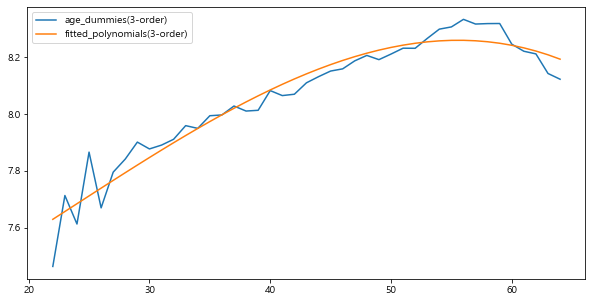

-----------------------------------------------------------
college
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     178.6
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           4.67e-22
Time:                        18:52:54   Log-Likelihood:                 58.058
No. Observations:                  41   AIC:                            -108.1
Df Residuals:                      37   BIC:                            -101.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

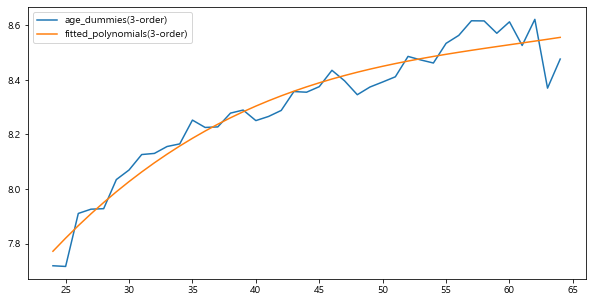

-----------------------------------------------------------
university
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     104.8
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.50e-17
Time:                        18:52:54   Log-Likelihood:                 51.677
No. Observations:                  39   AIC:                            -95.35
Df Residuals:                      35   BIC:                            -88.70
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

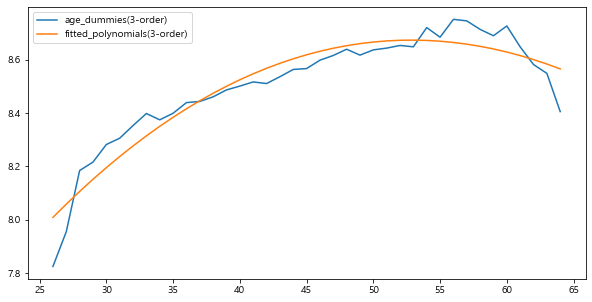

In [9]:
fitting_result_dict = {}
for i in fer_results_dict.keys():
    print("-----------------------------------------------------------")
    print(i)
    fitting_result_dict[i] = analysis_method.fitting_polynomial(fer_results_dict[i], 3)
    
    fitting_result_dict[i][0].plot(figsize=(10, 5))
    plt.show()

_______________________________


### 각 Educated group별 Labor income proﬁles (age dummies and ﬁtted 5th-order polynomials)

-----------------------------------------------------------
high_school
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     207.5
Date:                Mon, 18 May 2020   Prob (F-statistic):           5.38e-26
Time:                        10:17:46   Log-Likelihood:                 79.430
No. Observations:                  43   AIC:                            -146.9
Df Residuals:                      37   BIC:                            -136.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

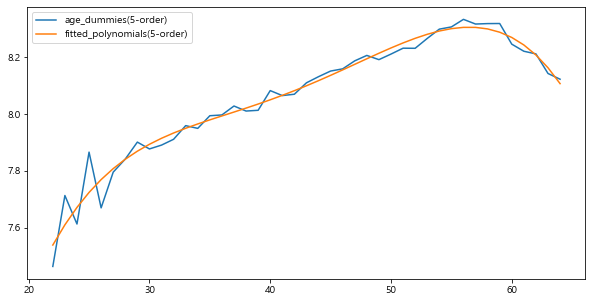

-----------------------------------------------------------
college
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     223.9
Date:                Mon, 18 May 2020   Prob (F-statistic):           1.57e-25
Time:                        10:17:47   Log-Likelihood:                 73.567
No. Observations:                  41   AIC:                            -135.1
Df Residuals:                      35   BIC:                            -124.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

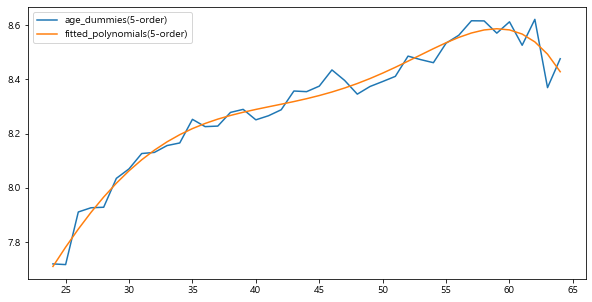

-----------------------------------------------------------
university
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     330.3
Date:                Mon, 18 May 2020   Prob (F-statistic):           3.61e-27
Time:                        10:17:47   Log-Likelihood:                 83.503
No. Observations:                  39   AIC:                            -155.0
Df Residuals:                      33   BIC:                            -145.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

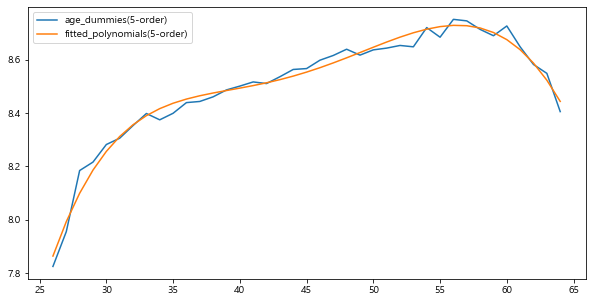

In [8]:
fitting_result_dict = {}
for i in fer_results_dict.keys():
    print("-----------------------------------------------------------")
    print(i)
    fitting_result_dict[i] = analysis_method.fitting_polynomial(fer_results_dict[i], 5)
    
    fitting_result_dict[i][0].plot(figsize=(10, 5))
    plt.show()